In [1]:
from flash_ansr import FlashANSR, SoftmaxSamplingConfig, BeamSearchConfig, MCTSGenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
MODEL = "psaegert/flash-ansr-v23.0-120M"

In [4]:
install_model(MODEL)

Installing model psaegert/flash-ansr-v23.0-120M to /home/psaegert/Projects/flash-ansr/models/psaegert/flash-ansr-v23.0-120M


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Model psaegert/flash-ansr-v23.0-120M installed successfully!


In [5]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    generation_config=SoftmaxSamplingConfig(choices=1024 * 32),
    parsimony=0.05,
).to(device)

In [6]:
widget = ScatterWidget()
widget

In [8]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [9]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 9599/9599 [00:04<00:00, 2284.41it/s]


In [10]:
nsr.get_expression()

'4.93 + 1.48 * asinh(cosh(-5.29 + x1)) * cos(0.32 * (-5.55 + x1))'

In [11]:
# # Optional: Re-compile with different parsimony
# nsr.compile_results(parsimony=0.02)

In [12]:
nsr.results

,log_prob,fvu,score,expression,complexity,requested_complexity,raw_beam,beam,raw_beam_decoded,function,refiner,prompt_metadata,beam_id,fit_constants,fit_covariances,fit_loss
0,-32.059620,5.463780e-03,-1.462507,"[+, <constant>, *, <constant>, *, asinh, cosh,...",16,None,"[1, 9, 28, 6, 30, 6, 30, 53, 51, 28, 6, 66, 45...","[28, 6, 30, 6, 30, 53, 51, 28, 6, 66, 45, 30, ...","[+, <constant>, *, <constant>, *, asinh, cosh,...",<function <lambda> at 0x76b9e6c90a40>,"Refiner(expression=['+', '<constant>', '*', '<...","{'allowed_terms': [], 'include_terms': [], 'ex...",0,"[4.930044675819327, 1.4800654500742032, -5.285...","[[0.004971418436103421, -9.468218018816399e-05...",2.208286e-01
1,-24.069664,1.268393e-02,-1.046746,"[*, <constant>, -, *, <constant>, sin, *, <con...",17,None,"[1, 9, 30, 6, 29, 30, 6, 44, 30, 6, 29, 6, 29,...","[30, 6, 29, 30, 6, 44, 30, 6, 29, 6, 29, 38, 3...","[*, <constant>, -, *, <constant>, sin, *, <con...",<function <lambda> at 0x76b9e7bb65c0>,"Refiner(expression=['*', '<constant>', '-', '*...","{'allowed_terms': [], 'include_terms': [], 'ex...",1,"[2.0698669716299523, -4.258329851277949, -0.29...","[[9715550349038.121, 19987766710613.527, -1267...",5.126440e-01
2,-27.649561,1.712488e-02,-1.016372,"[-, *, <constant>, cos, -, *, <constant>, cosh...",15,None,"[1, 9, 29, 30, 6, 45, 29, 30, 6, 51, 30, 6, 66...","[29, 30, 6, 45, 29, 30, 6, 51, 30, 6, 66, 30, ...","[-, *, <constant>, cos, -, *, <constant>, cosh...",<function <lambda> at 0x76b9e74d25c0>,"Refiner(expression=['-', '*', '<constant>', 'c...","{'allowed_terms': [], 'include_terms': [], 'ex...",2,"[8.960928903114413, -0.9425808293686733, -0.19...","[[0.02195785971233916, -1.695847478833612e-05,...",6.921332e-01
3,-23.911180,1.166417e-02,-0.983146,"[+, <constant>, -, *, -, x1, <constant>, +, <c...",19,None,"[1, 9, 28, 6, 29, 30, 29, 66, 6, 28, 6, 53, 29...","[28, 6, 29, 30, 29, 66, 6, 28, 6, 53, 29, 30, ...","[+, <constant>, -, *, -, x1, <constant>, +, <c...",<function <lambda> at 0x76b9e7b74220>,"Refiner(expression=['+', '<constant>', '-', '*...","{'allowed_terms': [], 'include_terms': [], 'ex...",3,"[5.369886699768663, -11.108502451121526, -3.64...","[[0.9599728967846742, -0.15719187993646688, -0...",4.714285e-01
4,-22.526861,1.259621e-02,-0.949760,"[+, *, <constant>, pow2, x1, -, +, *, <constan...",19,None,"[1, 9, 28, 30, 6, 36, 66, 29, 28, 30, 6, 66, 3...","[28, 30, 6, 36, 66, 29, 28, 30, 6, 66, 30, 6, ...","[+, *, <constant>, pow2, x1, -, +, *, <constan...",<function <lambda> at 0x76b9e7e99080>,"Refiner(expression=['+', '*', '<constant>', 'p...","{'allowed_terms': [], 'include_terms': [], 'ex...",4,"[0.3220112667792288, -7.993525779274757, -79.7...","[[0.000757559343029426, -0.02741521633429188, ...",5.090986e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8475,-26.773045,1.165131e+05,6.116375,"[+, *, <constant>, x1, -, *, x1, +, x1, /, pow...",21,None,"[1, 9, 28, 30, 6, 66, 29, 30, 66, 28, 66, 31, ...","[28, 30, 6, 66, 29, 30, 66, 28, 66, 31, 36, 66...","[+, *, <constant>, x1, -, *, x1, +, x1, /, pow...",<function <lambda> at 0x76b9e75447c0>,"Refiner(expression=['+', '*', '<constant>', 'x...","{'allowed_terms': [], 'include_terms': [], 'ex...",8475,"[17.244175590837834, 1.0787695124777819, -47.6...","[[1499.6387068344186, -0.006063461957521874, 1...",4.709088e+06
8476,-31.933023,4.939177e+05,6.543655,"[-, tanh, +, <constant>, /, pow2, x1, <constan...",17,None,"[1, 9, 29, 52, 28, 6, 31, 36, 66, 6, 30, 28, 6...","[29, 52, 28, 6, 31, 36, 66, 6, 30, 28, 6, 33, ...","[-, tanh, +, <constant>, /, pow2, x1, <constan...",<function <lambda> at 0x76b9e6c1e160>,"Refiner(expression=['-', 'tanh', '+', '<consta...","{'allowed_terms': [], 'include_terms': [], 'ex...",8476,"[-97156.90383871143, -199790.37274115946, -0.0...","[[inf, inf, inf, inf], [inf, inf, inf, inf], [...",1.996258e+07
8477,-48.899593,1.593305e+07,8.402299,"[+, <constant>, +, x1, *, x1, *, +, <constant>...",24,None,"[1, 9, 28, 6, 28, 66, 30, 66, 30, 28, 6, 66, 3...","[28, 6

In [13]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [14]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:130: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:173: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:33: RuntimeWarning: divide by zero encountered in divide
  return x / y
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:402: RuntimeWarning: overflow encountered in cosh
  return np.cosh(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:378: RuntimeWarning: overflow encountered in sinh
  return np.sinh(x)
/home/psaegert/miniconda3/envs/flash-ansr/lib/python3.13/site-packages/simplipy/operators.py:522: Runti

In [15]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

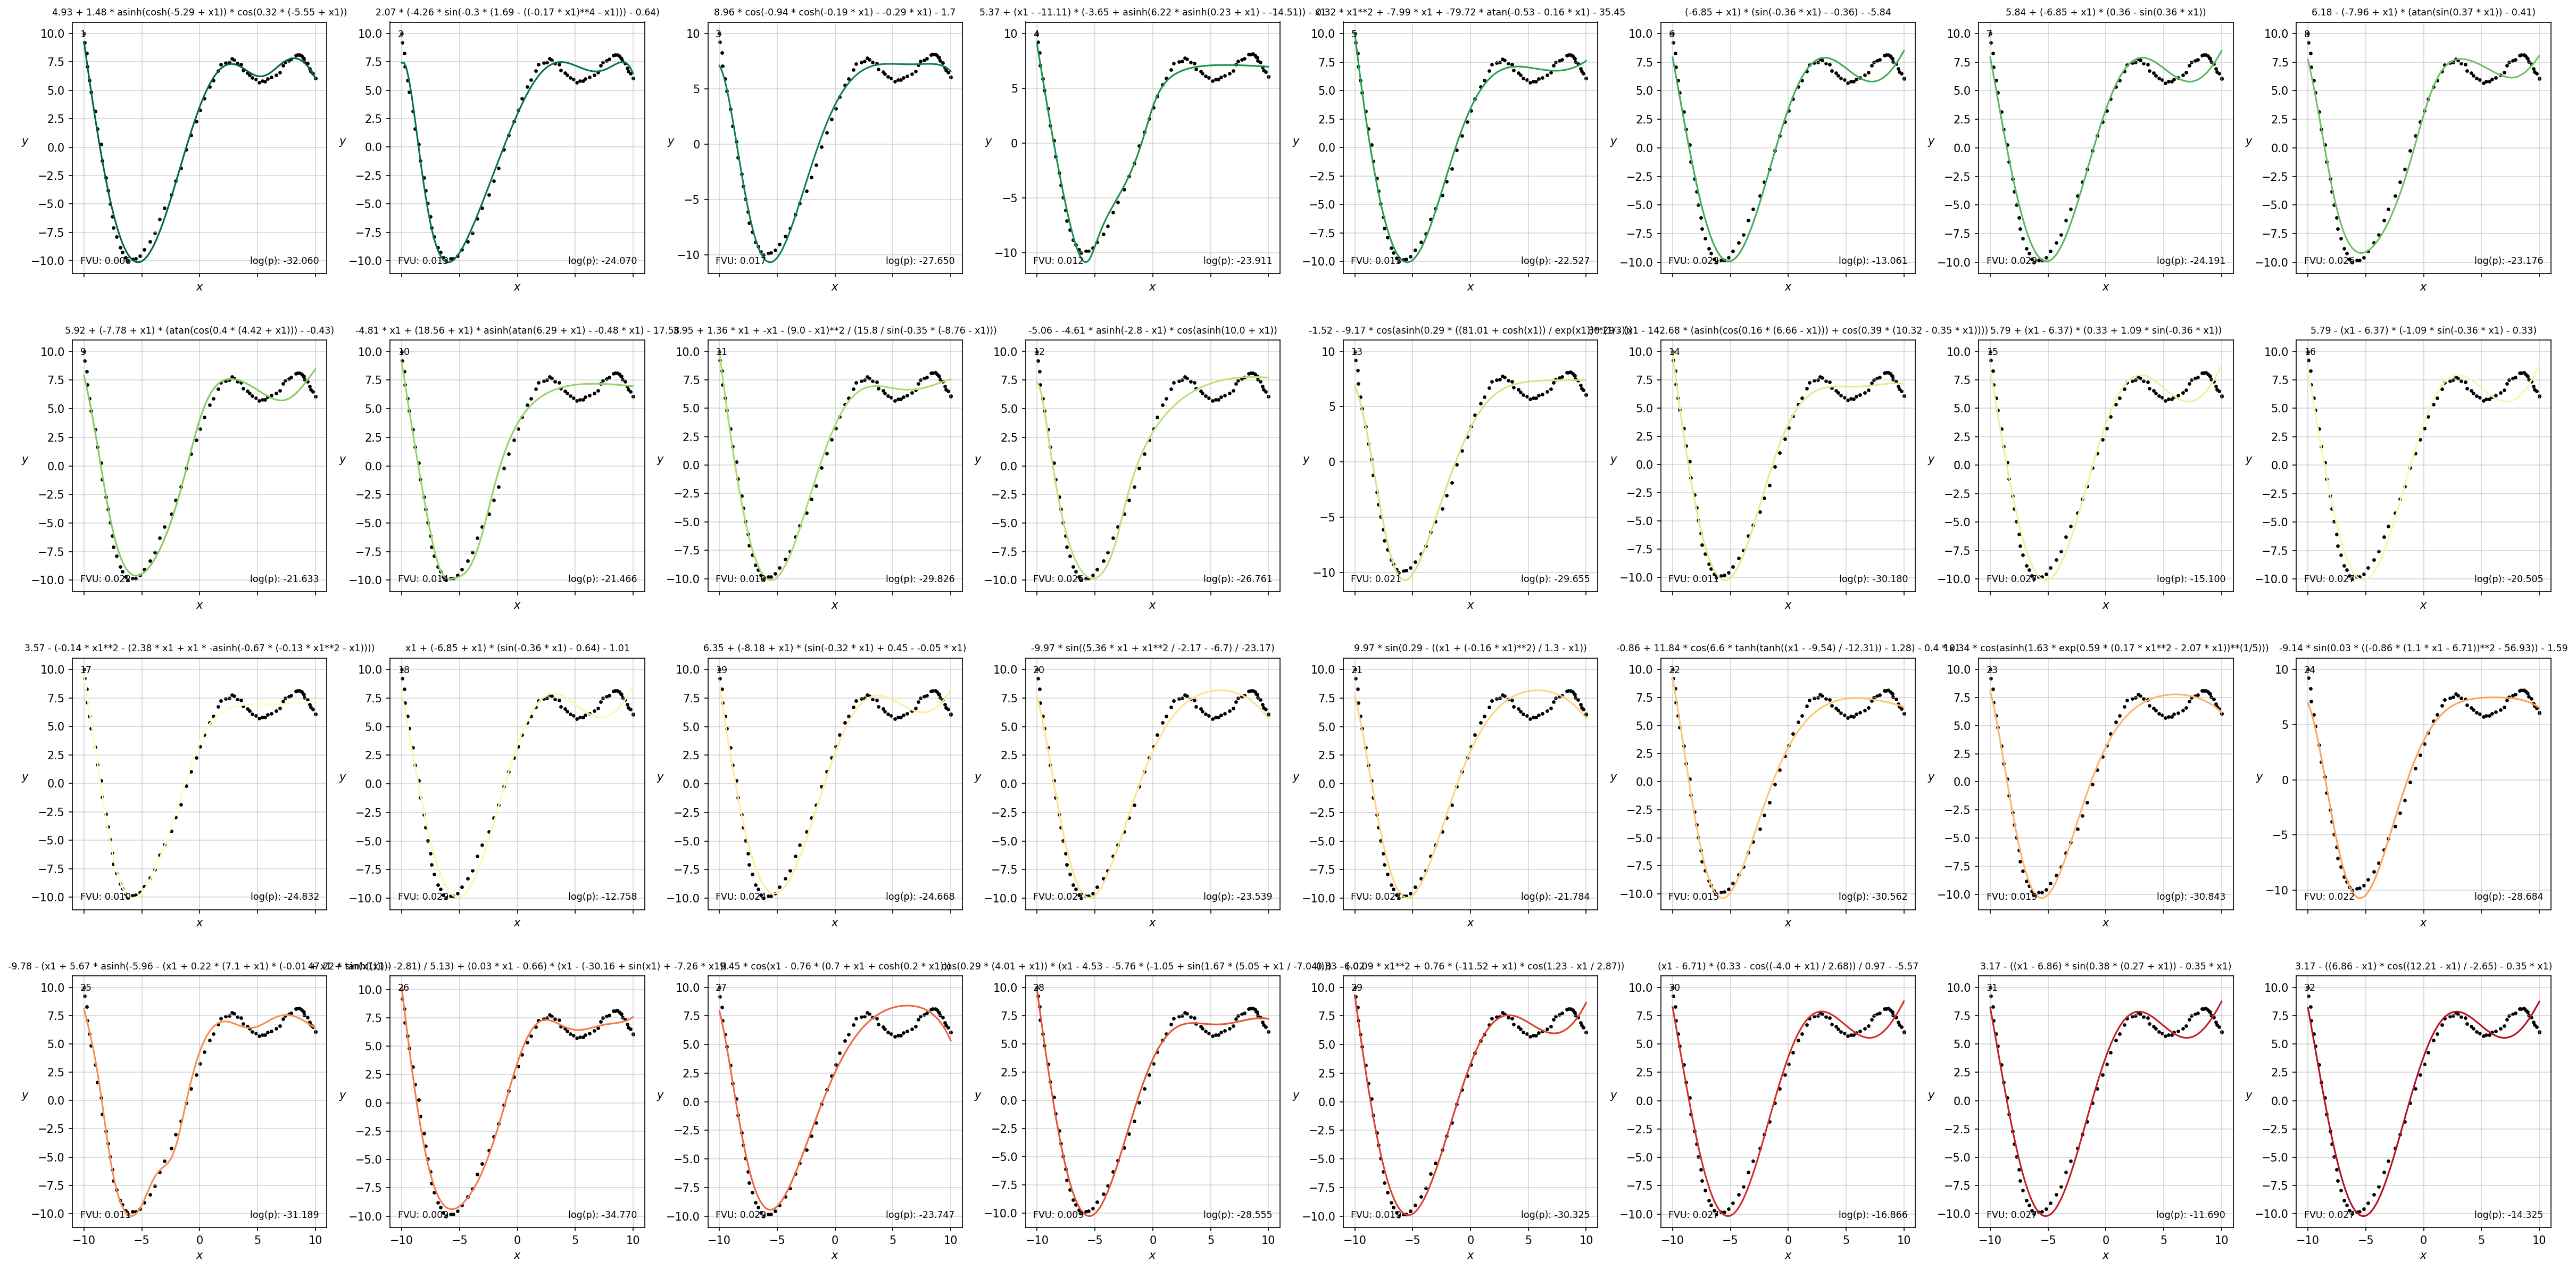

In [16]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)